# Colors in Visualisations

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import geopandas as gpd

In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [3]:
load_dotenv()

True

In [4]:
# Some helper functions
def plot_color_gradients(cmap_list, patchh=0.22):
    
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * patchh
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    # axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

# replaced plot_patch() by
# plot a grid of square patches from a list of color definitions
def plot_color_grid(colors):
    _, ax = plt.subplots(1, 1, figsize=(len(colors), 1))

    for i, color in enumerate(colors):
        rect = mpl.patches.Rectangle((i, 0), 1, 1, facecolor=color)
        ax.add_patch(rect)

    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.axis('off')  # Hide axes
    plt.show()

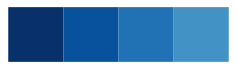

In [5]:
plot_color_grid(['#08306b', '#08519c', '#2171b5', '#4292c6'])

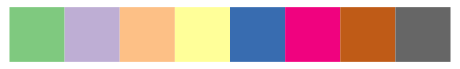

In [6]:
plot_color_grid(plt.cm.Accent(np.linspace(0, 1, plt.cm.Accent.N))) 

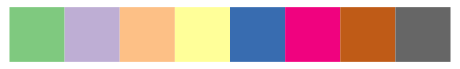

In [7]:
# all colors from a qualitative colormap:
plot_color_grid([plt.cm.Accent(i) for i in range(plt.cm.Accent.N)])

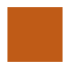

In [8]:
plot_color_grid([plt.cm.Accent(6)])

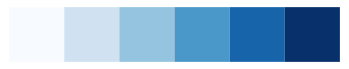

In [9]:
plot_color_grid(plt.cm.Blues(np.linspace(0, 1, 6))) # 6 equally spaced colors from a continuous colormap

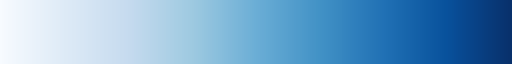

In [10]:
plt.cm.Blues

## Content 
With color we can

* distinguish groups of data
* highlight
* and represent data values

## Example Data

In [11]:
data_folder=os.getenv('DATA_FOLDER')

In [12]:
df = pd.read_csv(os.path.join(data_folder, 'uscensus', 'nst-est2020-popchg2010-2020.csv'), encoding='utf-8', delimiter=',')

In [13]:
df = df[(df['STATE']>0) & (df['REGION'] != 'X')].reset_index()

In [14]:
df = df[df['STATE'].isin([11,49,48,4,12,8,38,13,30,25,24,18,33,5,19,2,20,39,34,26,42,44,28,36,50,9,17,54])]

In [15]:
df['REGION']=pd.to_numeric(df['REGION'])

In [16]:
df['PCHG_2020-2010'] = (df['POPESTIMATE2020']/df['POPESTIMATE2010'] -1)*100

In [17]:
df_sorted = df[['REGION','NAME','STATE','PCHG_2020-2010']].sort_values(by=['PCHG_2020-2010'], ascending=False).reset_index()

In [18]:
len(df_sorted);

In [19]:
df_sorted.head().style.hide() # hide index column

index,REGION,NAME,STATE,PCHG_2020-2010
8,3,District of Columbia,11,17.765934
44,4,Utah,49,17.095330
43,3,Texas,48,16.317561
2,4,Arizona,4,15.826516
9,3,Florida,12,15.319681


## Qualitative Color Scales 
to distinguish groups that have no ordering or relationships

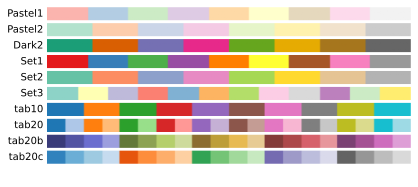

In [20]:
plot_color_gradients(['Pastel1', 'Pastel2', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

## Example with Qualitative Color Scale
Population change in Percent for selected U.S. states from 2010 to 2020. Data source: U.S. Census Bureau

/var/folders/g8/ts4wj2w128q2scsf9ttnhwq40000gn/T/ipykernel_68766/3451485710.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('Accent')


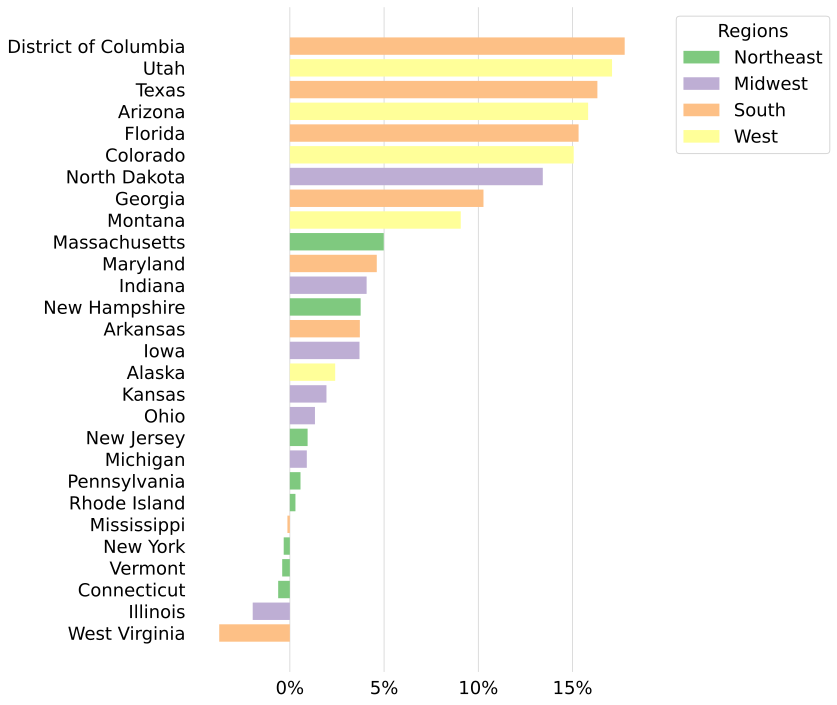

In [21]:
fig, ax = plt.subplots(figsize =(8, 12))

ax.spines[:].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))

ax.yaxis.set_tick_params(labelsize = 18)
ax.xaxis.set_tick_params(labelsize = 18)

# Add gridlines
ax.grid(axis='x',
        color ='lightgrey',
        linestyle ='-'
       )
ax.set_axisbelow(True)

ax.invert_yaxis()

cmap = mpl.cm.get_cmap('Accent')

ax.barh(df_sorted['NAME'], df_sorted['PCHG_2020-2010'], color=cmap(df_sorted['REGION']-1)) # colors Horizontal Bar Plot

# add a legend
region_map={1:'Northeast', 2:'Midwest', 3:'South', 4:'West'}
handles = [mpl.patches.Rectangle((0, 0), 1, 1, label=label, facecolor=cmap(key-1)) for key, label in region_map.items()]
ax.legend(title='Regions', handles=handles, bbox_to_anchor=(1.05, 1), loc='best', fontsize=18, title_fontsize=18)

plt.show()

## Massachussets and its Neighbours

In [22]:
states_2_highlight = ['Massachusetts', 'Connecticut', 'Vermont', 'New York']

df_sorted[df_sorted['NAME'].isin(states_2_highlight)]

,index,REGION,NAME,STATE,PCHG_2020-2010
9,21,1,Massachusetts,25,4.981908
23,32,1,New York,36,-0.325671
24,45,1,Vermont,50,-0.405665
25,6,1,Connecticut,9,-0.619333


In [23]:
fp_shp_states = os.path.join(data_folder, 'cb_2018_us_state_5m', 'cb_2018_us_state_5m.shp')

Massachusetts and neighbouring states. Source: U.S. Census

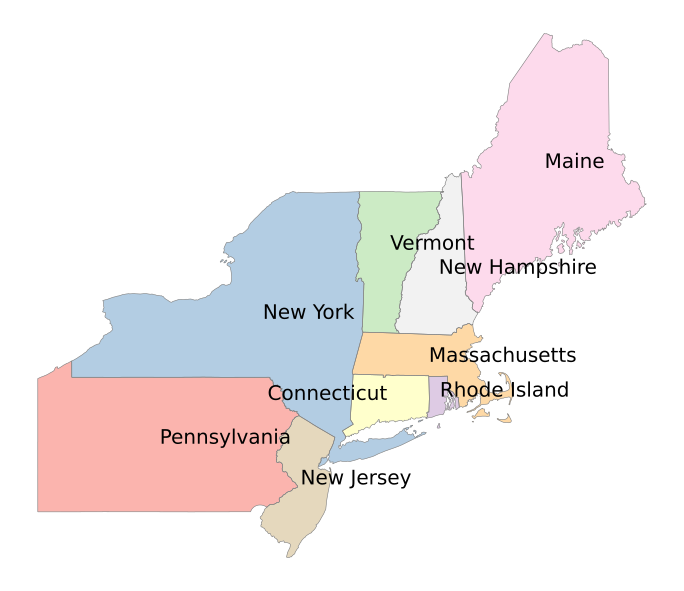

In [24]:
states = gpd.read_file(fp_shp_states)
states = states.to_crs("EPSG:3395")
selection = states[states['STUSPS'].isin(['PA', 'NY', 'VT', 'RI', 'MA', 'CT', 'NJ', 'ME', 'NH'])]

fig, ax = plt.subplots(figsize=(12,12))
selection[selection['STUSPS'] != 'CT'].apply(lambda x: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0],
                                      ha='left', fontsize=20), axis=1);
selection[selection['STUSPS'] == 'CT'].apply(lambda x: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0],
                                      ha='right', fontsize=20), axis=1);
selection.boundary.plot(ax=ax, color='grey', linewidth=0.6)
selection.plot(ax=ax, cmap='Pastel1', figsize=(24, 12))

ax.spines[:].set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.show()

## Highlight with Accent Colors

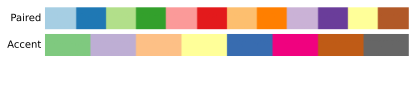

In [25]:
plot_color_gradients(['Paired', 'Accent'], 0.5)

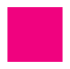

In [26]:
# I have replaced the plot_patch() method by plot_color_grid()
# and mpl.cm.get_cmap('Accent') by mpl.cm.Accent because of a
# deprecation warning in the current matplotlib version

# the 5th color from the Accent colormap (qualitative - fixed number of .N colors):
plot_color_grid([mpl.cm.Accent(5/mpl.cm.Accent.N)])

## Highlight with Accents - Example

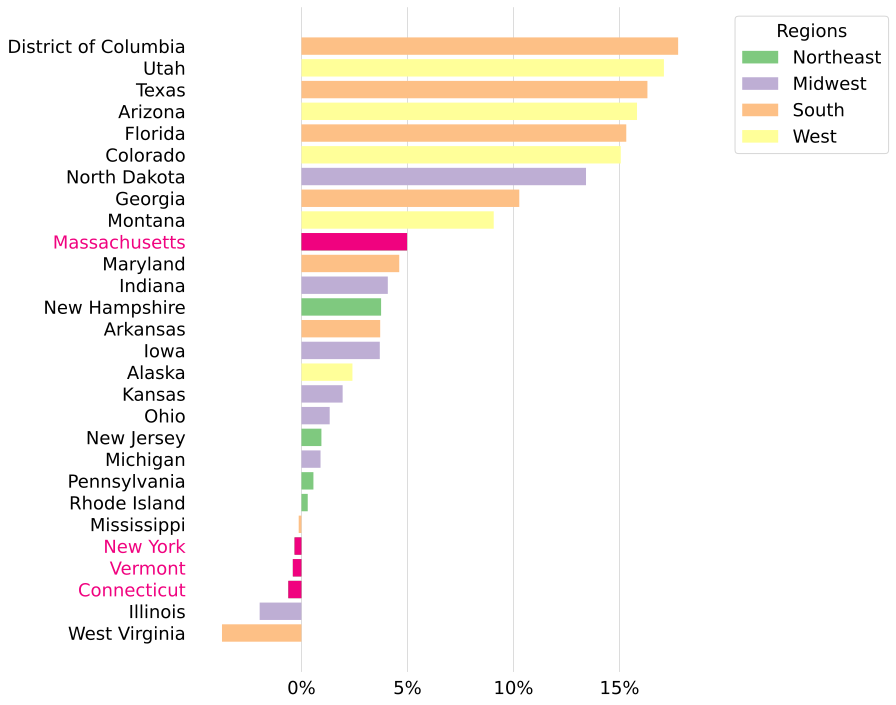

In [27]:
fig, ax = plt.subplots(figsize =(9, 12))

ax.spines[:].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))

ax.yaxis.set_tick_params(labelsize = 18)
ax.xaxis.set_tick_params(labelsize = 18)
 
# Add gridlines
ax.grid(axis='x',
        color ='lightgrey',
        linestyle ='-'
       )
ax.set_axisbelow(True)

ax.invert_yaxis()

cmap = mpl.cm.Accent
c_acc = mpl.cm.Accent(5/mpl.cm.Accent.N) # the accent to color the states to highlight

df_acc = df_sorted[df_sorted['NAME'].isin(states_2_highlight)]

ax.barh(df_sorted['NAME'], df_sorted['PCHG_2020-2010'], color=cmap(df_sorted['REGION']-1))
ax.barh(df_acc['NAME'], df_acc['PCHG_2020-2010'], color=c_acc) # overlay the highlight bars

# retrieve the labels of the bars to highlight
for i in df_acc.index.tolist():
    ax.get_yticklabels()[i].set_color(c_acc)

# the legend
region_map={1:'Northeast', 2:'Midwest', 3:'South', 4:'West'}
handles = [mpl.patches.Rectangle((0, 0), 1, 1, label=label, facecolor=cmap(key-1)) for key, label in region_map.items()]
ax.legend(title='Regions', handles=handles, bbox_to_anchor=(1.05, 1), loc='best', fontsize=18, title_fontsize=18)

plt.show()

## Accent vs. Baseline Colors

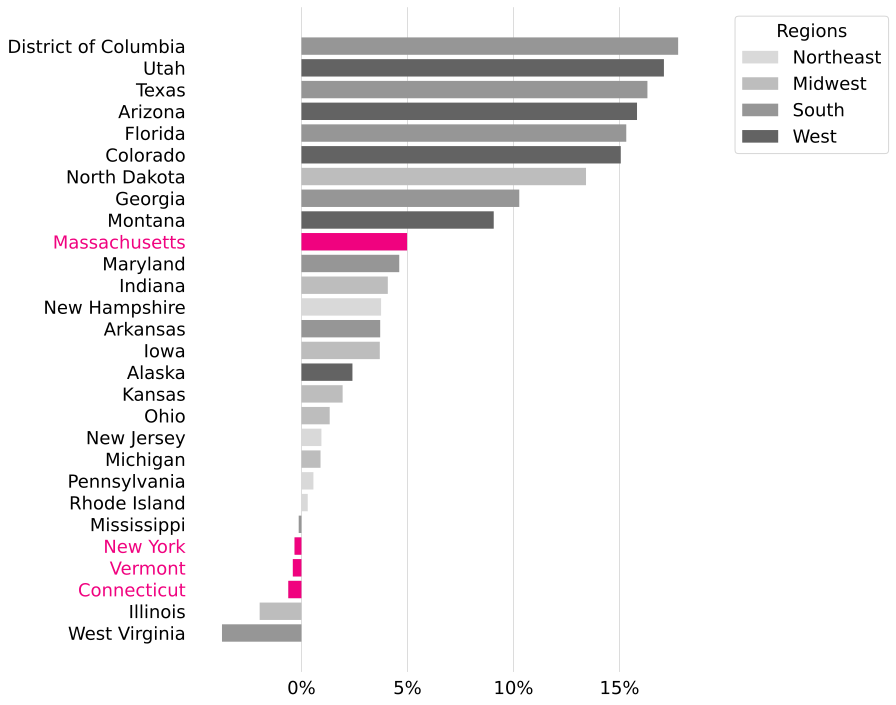

In [28]:
fig, ax = plt.subplots(figsize =(9, 12))

ax.spines[:].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))

ax.yaxis.set_tick_params(labelsize = 18)
ax.xaxis.set_tick_params(labelsize = 18)
 
# Add gridlines
ax.grid(axis='x',
        color ='lightgrey',
        linestyle ='-'
       )
ax.set_axisbelow(True)

ax.invert_yaxis()

cmap = mpl.cm.tab20c_r # mpl.cm.get_cmap('tab20c_r')
c_acc = mpl.cm.Accent(5/mpl.cm.Accent.N) # the accent to color the states to highlight

df_acc = df_sorted[df_sorted['NAME'].isin(states_2_highlight)]

ax.barh(df_sorted['NAME'], df_sorted['PCHG_2020-2010'], color=cmap(df_sorted['REGION']-1))
ax.barh(df_acc['NAME'], df_acc['PCHG_2020-2010'], color=c_acc) # overlay the highlight bars

# retrieve the labels of the bars to highlight
for i in df_acc.index.tolist():
    ax.get_yticklabels()[i].set_color(c_acc)

# the legend
region_map={1:'Northeast', 2:'Midwest', 3:'South', 4:'West'}
handles = [mpl.patches.Rectangle((0, 0), 1, 1, label=label, facecolor=cmap(key-1)) for key, label in region_map.items()]
ax.legend(title='Regions', handles=handles, bbox_to_anchor=(1.05, 1), loc='best', fontsize=18, title_fontsize=18)

plt.show()

## Sequential Color Scales
* encode data values change in lightness and often saturation of color incrementally 
* using single or multiple hues
* should be used for representing information that has ordering.

In some scales the lightness varies approximately linear:

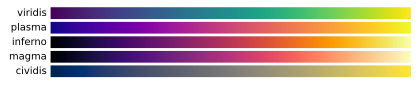

In [29]:
plot_color_gradients(['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

## Sequential Color Scales II
Sequential color scales im matplotlib with curved variation in lightness

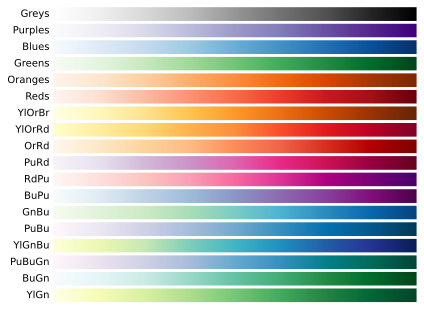

In [30]:
plot_color_gradients(['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

## Sequential Color Scales III

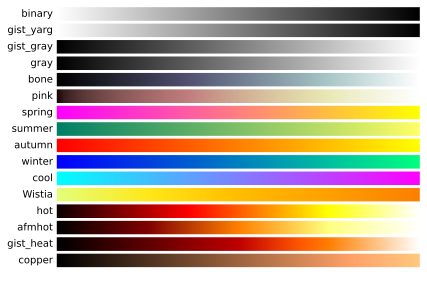

In [31]:
plot_color_gradients(['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

## Example with Sequential Color Scale

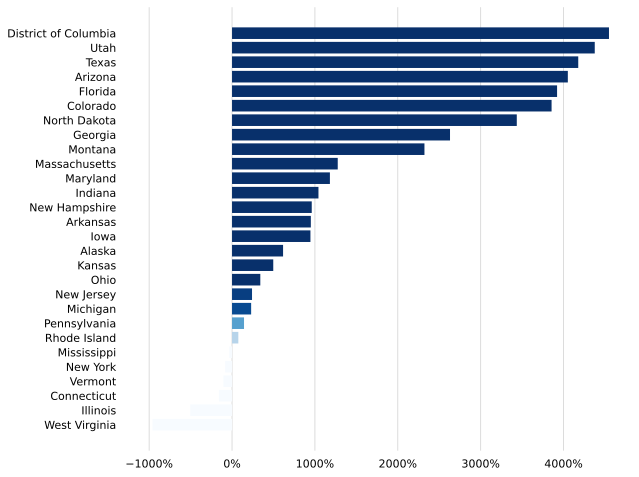

In [32]:
fig, ax = plt.subplots(figsize =(9, 8))

ax.spines[:].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))

ax.yaxis.set_tick_params(labelsize = 11)
ax.xaxis.set_tick_params(labelsize = 11)
 
# Add gridlines
ax.grid(axis='x',
        color ='lightgrey',
        linestyle ='-'
       )
ax.set_axisbelow(True)

ax.invert_yaxis()

cmap =  mpl.cm.Blues # mpl.cm.get_cmap('Blues')

ax.barh(df_sorted['NAME'], df_sorted['PCHG_2020-2010'], color=cmap(df_sorted['PCHG_2020-2010'])) # colors Horizontal Bar Plot

plt.show()

## Colormap Normalisation

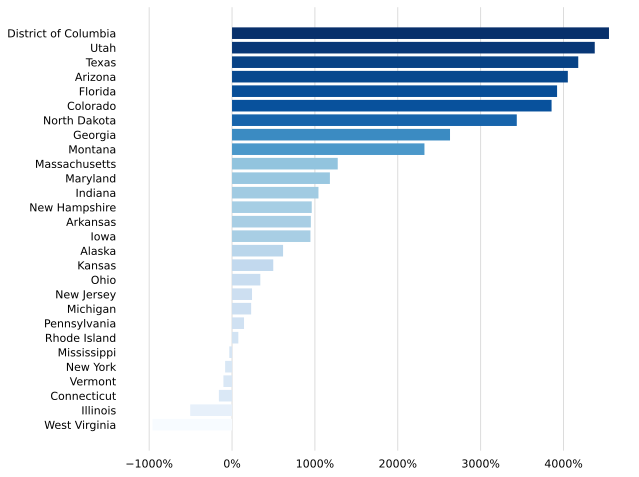

In [33]:
fig, ax = plt.subplots(figsize =(9, 8))

ax.spines[:].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))

ax.yaxis.set_tick_params(labelsize = 11)
ax.xaxis.set_tick_params(labelsize = 11)

# Add gridlines
ax.grid(axis='x',
        color ='lightgrey',
        linestyle ='-'
       )
ax.set_axisbelow(True)

ax.invert_yaxis()

cmap = mpl.cm.Blues
# Normalise the data that is passed to the color map
# The default is linear normalisation (min/max scaling):
norm = mpl.colors.Normalize(vmin=df_sorted['PCHG_2020-2010'].min(), vmax=df_sorted['PCHG_2020-2010'].max())

ax.barh(df_sorted['NAME'], df_sorted['PCHG_2020-2010'], color=cmap(norm(df_sorted['PCHG_2020-2010']))) # colors Horizontal Bar Plot

plt.show()

## Diverging Color Scales
To visualize the deviation of data values in one of two directions relative to a neutral midpoint.  
Use different colors for the two directions.

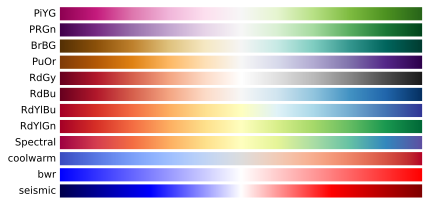

In [34]:
plot_color_gradients(['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

## Example with Diverging Color Scale

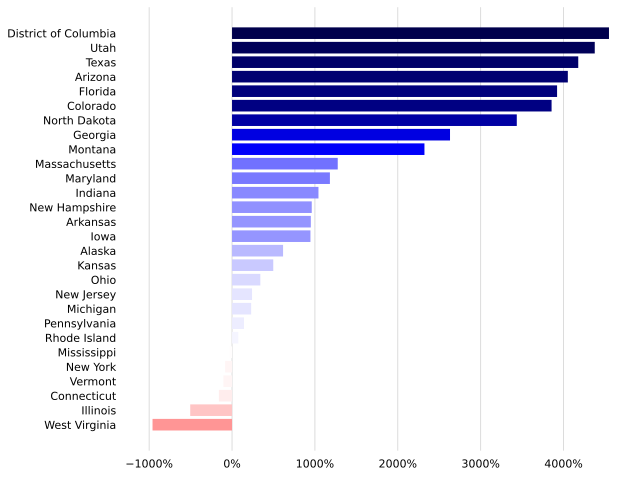

In [35]:
fig, ax = plt.subplots(figsize =(9, 8))

ax.spines[:].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))

ax.yaxis.set_tick_params(labelsize = 11)
ax.xaxis.set_tick_params(labelsize = 11)
 
# Add gridlines
ax.grid(axis='x',
        color ='lightgrey',
        linestyle ='-'
       )
ax.set_axisbelow(True)

ax.invert_yaxis()

cmap = mpl.cm.seismic_r
# With positive and negative values around a center 0 a divergent colormap is best combined with a centered normalisation
# Also a logoraithmic scaling separately for both the positive and negative side is possible: mpl.colors.SymLogNorm
norm = mpl.colors.CenteredNorm()

ax.barh(df_sorted['NAME'], df_sorted['PCHG_2020-2010'], color=cmap(norm(df_sorted['PCHG_2020-2010']))) # colors Horizontal Bar Plot

plt.show()